# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

**Project Idea**

Considering that I would love to explore Natural Language Processing further and we have performed a sentiment analysis pipeline for the book review dataset in the last lab, the ML problem that I am interested in is applying a similar approach (even with multiclass sentiments) for a new, external dataset. We can test both more basic models (e.g. logisitic regression) and neural networks!


**Import IMDB Movie Reviews Dataset from Kaggle**

Note: To connect with my kaggle acount, I've added the kaggle.json file to our directory

I've then performed the download through the terminal. The steps are as follows:
- mkdir ~/.kaggle
- cp kaggle.json ~/.kaggle/
- kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Then unzip the zip file, which downloads the dataset as csv in local folder, will add to gitignore so it doesn't have to be pushed to github

**Note this only has to be done once since we can just load the csv into our local directory to use for future runs**

In [ ]:
import zipfile
import os

zip_path = 'imdb-dataset-of-50k-movie-reviews.zip'
extract_path = 'data'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [2]:
# load csv as a pandas dataframe
df_imdb = pd.read_csv('data/IMDB Dataset.csv', encoding='utf-8')

In [3]:
df_imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

**Formulating ML Problem**
1. I have decided to utilize an external dataset, IMDB Movie Reviews (very similar to book reviews), which contain sentiment labels
2. I will be predicting whether a certain movie review is positive or negative sentiment. In this case, the sentiment is the label.
3. This is a supervised learning problem, namely binary classification.
4. Our features will constitute of the respective vectors or embeddings we create for our pre-processed text data / tokens, which could constitute of word frequencies, tf-idf measures for words, or word embeddings. This is subjective on the NLP vectorization technique we will be using for this problem. I will try both tf-idf and word embeddings and pick the one that performs better.
5. This is an important problem because in the world of Big Data and an incredible amount of text being available on the internet, being able to classify a review as positive or negative at a mass scale using an accurate machine learning project can be super important to gain an overview of overall sentiment. Additionally, it opens the doors for further analysis of those classified as positive or negative respectively with things like Topic Modeling, Fine Tuning and other NLP related. In this case for movie reviews, we can capture overall sentiment for a particular film to influence future decision making as one example of its use case.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# print first 10 rows
df_imdb.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
# look at size of dataset
df_imdb.shape # there are 50k total reviews

(50000, 2)

In [6]:
# print number of positive and negative reviews
df_imdb['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

**Due to large dataset size, we will only pull a sample of 3000 positive and 3000 negative reviews**

In [7]:
pos_reviews = df_imdb[df_imdb['sentiment'] == 'positive'].sample(n=3000, random_state=42)
neg_reviews = df_imdb[df_imdb['sentiment'] == 'negative'].sample(n=3000, random_state=42)

In [8]:
df_sample = pd.concat([pos_reviews, neg_reviews]).sample(frac=1, random_state=42).reset_index(drop=True) # combine, shuffle

In [9]:
df_sample.head() # print out first 5 rows

,review,sentiment
0,Many American pea-brains who worship and suppo...,positive
1,Probably somebody heard of Alberto Tomba. A fo...,negative
2,"This is a pretty obscure, dumb horror movie se...",positive
3,Can't get much eerier than Flatliners. This de...,positive
4,Hands down the worst movie I have ever seen. I...,negative


In [10]:
df_sample['sentiment'].value_counts() # check updated value counts

sentiment
positive    3000
negative    3000
Name: count, dtype: int64

In [11]:
# print example of positive and negative review
print('Positive Review: \n\n', df_sample.loc[0, 'review'])
print()
print('Negative Review: \n\n', df_sample.loc[4, 'review'])

Positive Review: 

 Many American pea-brains who worship and support the political half-truths of hucksters like Michael Moore would do well to sit through this movie more than once and see how hypnotic manipulators can scare, intimidate and lie to an underinformed public and get the people they fear or loathe killed, spindled and mutilated. Robespierre in this fine epic kills the opposition by remote control, all in a fit of self-righteous devotion to his principles. We get the impression that Robes felt it quite justifiable to snip off his opponent's heads, even as he sent his minions out to trump up false and misleading charges against the State. Today, the captains of our rotting media institutions are much more sensitive that Robes...they merely murder your character with innuendo and false charges laid down without foundation or sources. Witness Dan Rather's attempts to assassinate W's character on the eve of the 2004 election, or the constant drumbeat that the 2000 election was 

**It looks like some reviews might contain some html tags, punctuation, and unnecessary words that would have to be filtered out in the preprocessing step. We would also have to split each review into smaller segments (e.g. words or n-grams) through tokenization since many vary in length.**

Strategies for Data Preparation and Modeling:
- We will have to apply some NLP preprocessing techniques like removing punctuation and stop words, as well as tokenization, lowercasing, lemmatization, and finally vectorization. We can use gensim or the NLTK libraries for this.
- Some models to consider are Logistic Regression and a Feed-Forward Neural Net.
- To evaluate our model's performance, we can use accuracy and an AUC-ROC score / curve as well as a confusion matrix.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes, our feature list (after NLP preprocessing steps) will contain tfidf scores for each word in our vocabulary (tfidf vectorizer). However, if this doesn't result in optimal performance for our model, we will try embedding our words using Word2Vec to capture more semantic meaning.
2. The different data preparation techniques we will be using will be common to an NLP pipeline. We will be lowercasing all of the words, removing punctuation, stop words, and html tags, as well as also performing lemmatization and tokenization (to get sentences / paragraphs into a list of words). We will be using gensim and NLTK libraries for these tasks.
3. The models we will be using for sentiment classification are Logisitic Regression and a Keras Neural Network.
4. Our plan will be to first split our dataset into training, validation, and test. We can then transform each set using tfidf vectorization and fit the models on our tfidf matrix. We can then evaluate the performances accuracies of the model (both Logistic Regression / NN) using both training and test and tweak hyperparameters, especially for our neural network. Lastly, with optimal parameters set, we will test our model on our test set.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [12]:
# YOUR CODE HERE
# for data cleaning / pre-processing
# import gensim
# import nltk
# import string
# import re # regular expression

from preprocessing import preprocess

# from nltk.corpus import stopwords
# from nltk.stem.wordnet import WordNetLemmatizer
# from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# # necessary packages to use imports above
# nltk.download('punkt_tab')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# for binary classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, roc_auc_score
import tensorflow.keras as keras

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### Preprocessing Our Data and Splitting in Training and Testing

In [13]:
# start by assigning X and y (labels)
X = df_sample['review']
y = df_sample['sentiment']

In [14]:
# encode our labels into binary numbers (0 representing negative and 1 representing positive)
# Create a label encoder instance
le = LabelEncoder()

# Fit and transform the labels
y_encoded = le.fit_transform(y)
  
print(le.classes_)
print(y_encoded[:10])


['negative' 'positive']
[1 0 1 1 0 1 1 1 1 1]


1 represents 'positive' whereas 0 represents 'negative'

In [15]:
X.head() # examine reviews again

0    Many American pea-brains who worship and suppo...
1    Probably somebody heard of Alberto Tomba. A fo...
2    This is a pretty obscure, dumb horror movie se...
3    Can't get much eerier than Flatliners. This de...
4    Hands down the worst movie I have ever seen. I...
Name: review, dtype: object

**Preprocess each document / review using customized function in preprocessing.py**

In [16]:
# double check dataset size
print(X.shape)
print(y_encoded.shape)

(6000,)
(6000,)


In [ ]:
# # define stopwords, punctuation to remove
# stopw = set(stopwords.words('english')) # includes common words in book reviews
# punctuation = re.escape(string.punctuation) # originally was using list but this is cleaner and faster, uses regular expressions

# print(punctuation)

In [ ]:
# # define the lemmatizer from nltk (reduces words to their base form like acting-> act)
# lemmatizer = WordNetLemmatizer()

In [ ]:
# # define preprocessing pipeline in method
# def preprocess(document):
#     # handle empty documents or non-strings (just incase)
#     if not isinstance(document, str):
#         return ''

#     # handle some of the encoding issues
#     document = document.replace('\x96', '—') # em dash
#     document = document.replace('\x91', "'")  # Left single quote
#     document = document.replace('\x92', "'")  # Right single quote
#     document = document.replace('\x93', '"')  # Left double quote
#     document = document.replace('\x94', '"')  # Right double quote
#     document = document.replace('\x97', '—')  # Em dash
    
#     # remove any html entities
#     document = re.sub(r'<.*?>', '', document)
#     # strip any leading or trailing whitespace and lowercase
#     document = document.strip().lower()
#     document = re.sub(rf'[{punctuation}]', '', document) # remove punctuation using regular expressions (escaped punctuation string)
     
#     tokens = word_tokenize(document) # tokenize the cleaned document using nltk method so we can easily remove stop words / lemmatize
#     tokens = [word for word in tokens if word not in stopw] # remove stopwords
#     tokens = [lemmatizer.lemmatize(word) for word in tokens] # lemmatize words
    
#     cleaned_doc = ' '.join(tokens) # join tokens back together, separated by a space

#     return cleaned_doc

In [17]:
# perform preprocessing for one random review for testing
test_rev = X[20]
print('Original review:\n', test_rev)
print('Cleaned review:\n', preprocess(test_rev))

Original review:
 While I had wanted to se this film since the first time I watched the trailer, I was in for a deep surprise with this film. While some of the elements and actions of the characters seemed a little too cartoonish,' the dark nature of the film really makes this a much different experience. Instead of the feel-good-happy-story, this film takes you in another direction that proves to be uplifting, but also disturbing. Most kids won't understand some of the darker moments in the film, which makes this film rather watchable for adults. I was also impressed with the cinematography, using animation and digital animation to create a seamless network of pans and tilts. The musical score was once again solid, proving Hans Zimmer is the go-to guy when it comes to animated scores, and I never thought I would say I actually enjoyed Brian Adams' music.
Cleaned review:
 wanted se film since first time watched trailer deep surprise film element action character seemed little cartooni

**This looks good for the most part so we can now apply this to our set of 6000 reviews**

In [18]:
# now apply this preprocessing to each document, this takes a little while
X_cleaned = [preprocess(doc) for doc in X]

In [19]:
# ensure this worked
X_cleaned[10]

'going make movie book sure character consistant book movie defied biblical story told thousand upon thousand year child one way another clearly took liberty adaptation would probably ever try least lord ring close enough book people understand story read book noah ark tried'

**With all documents preprocessed and cleaned, let's split them into training and testing datasets**

In [20]:
# split into training and test dataset into 75-25, also store indices from original dataset (useful later)
original_indices = X.index
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X_cleaned, y_encoded, original_indices, test_size=0.25, random_state=1234)

In [21]:
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

Training set size: 4500
Test set size: 1500


In [22]:
X_train[:5]

['bottom barrel type bfilm one poverty row studio monogram mid40s kind filled double billonly reason watched see jackie moran like leading role page boy radio station attempt solve murder played phil meade gone wind two year earlier one last teenaged role he mickey rooneythe script hapless production value full cliché ridden situation cast uniformly untalented individual wanda mckay switchboard girl discovered radio producer sidney miller nerdy friend hero who afraid shadowmercifully hour murder solved roundup suspect terribly overacted quiet performance interest given jon gilbreath tex cowboy bite dust brief appearancethere several song forgettable lame joke dialog',
 'directed jacques tourneur cat people past night demon written phillip dunne green valley anne indie quite interesting adventure pirate movie main character captain anne providence based real womanpirate anne boney actually lived sailed 18th century atlanticthe film begin sea battle anne jean peter pirate ship attack tra

In [23]:
X_test[:5]

['one considered key precode film — director later made musical biopic jolson story 1946 also paranoid scifi invasion usa 1952 — feature one barbara stanwycks best early rolesshes supported fine cast includes popular actor valued character performer day — george brent douglas dumbrille edward van sloan nat pendleton john wayne one point addressing stanwyck titular nickname derived popular song heard constantly throughout former category latter robert barrat stanwycks father donald cook tragic conquest alphonse ethier elderly mentor — later arthur hohl lecherous politician henry kolker cook bos fatherinlaw stanwyck also seduces curiously scene walter brennan appeared subsequently deleted request film ran trouble censorsabetted crackling ie typically hardboiled dialogue realistic anton grot set narrative contains unexpected overtone nietzschean philosophy fed smalltown heroine intellectual ethier stanwyck complains early shes ball fire course contradicts later comedy — directed howard ha

**Vectorize each preprocessed document using Tfidf vectorizer to create a matrix of features for each document**

In [24]:
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1,2), # use unigrams and bigrams
    min_df=5, # ignore rare words appearing in < 5 docs
    max_df = 0.8, # ignore very common words
    stop_words='english' # as safe measure, remove stop words again
)

# fit the vectorizer to the training data
tfidf_vectorizer.fit(X_train)

# using fitted vectorizer, transform training set
X_train_tfidf = tfidf_vectorizer.transform(X_train)

# do same for test data set
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [25]:
# examine vectorized data
print(X_train_tfidf.todense()) # as we can see it is a sparse matrix

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
X_train_tfidf[0].shape # 14290 represents each word in the vocabulary which is a single 'feature' in this case

(1, 14290)

In [27]:
# grab vocabulary size
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

14290


In [28]:
# print first 5 words in vocabulary
first_five = list(tfidf_vectorizer.vocabulary_.items())[0:5]
print('Glimpse of first 5 entries of the mapping of a word to its column/feature index \n{}:'.format(first_five))

Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('barrel', 1088), ('type', 13240), ('poverty', 9814), ('row', 10935), ('studio', 12264)]:


### Fitting a Logistic Regression Model to Transformed Training Data and Evaluating Using Accuracy, AUC Score, and Confusion Matrix

In [29]:
# we will first try with no tweaking of the C regularization hyperparameter
model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [30]:
# evaluate
probability_predictions = model_lr.predict_proba(X_test_tfidf) [:, 1]
loss = log_loss(y_test, probability_predictions) # get loss

print('Log loss on test data:', loss)
    
# get a list of all of the class predictions using predict(), uses 0.5 as threshold by default
predictions = model_lr.predict(X_test_tfidf)
    
# grab accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy on test data: {:.4f}'.format(accuracy))

# grab auc score from the roc curve (will plot this later)
auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

Log loss on test data: 0.4378155555884926
Accuracy on test data: 0.8373
AUC on the test data: 0.9184


Overall, the logistic regression performs relatively well on the test data with 83% accuracy, we will now try finding an optimal regularization hyperparameter and seeing if the performance is any better.

**C Regularization Hyperparameter Tuning using GridSearchCV**

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {'C': [10**i for i in range(-5,5)]} 
# strong regularization results in a simpler model (lower C) and higher regularization results in more complex model (higher C)

param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [33]:
# define model again
logreg = LogisticRegression(max_iter=200)

In [34]:
grid= GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5 # 5-fold cross validation
)

grid_search = grid.fit(X_train_tfidf, y_train)

In [35]:
# print best hyperparameters
best_C = grid_search.best_params_
best_C

{'C': 10}

Let's try evaluating our model with this hyperparameter

In [36]:
model_lr_best = LogisticRegression(max_iter = 200, C=10)
model_lr_best.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [37]:
# evaluate as we did before
prob_predictions = model_lr_best.predict_proba(X_test_tfidf) [:, 1]
loss = log_loss(y_test, prob_predictions) # get loss

print('Log loss on test data:', loss)
    
# get a list of all of the class predictions using predict(), uses 0.5 as threshold by default
predictions = model_lr_best.predict(X_test_tfidf)
    
# grab accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy on test data: {:.4f}'.format(accuracy))

# grab roc_auc score
auc = roc_auc_score(y_test, prob_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

Log loss on test data: 0.35356201492479383
Accuracy on test data: 0.8407
AUC on the test data: 0.9228


Looks like we got slightly higher accuracy, lower loss, and a higher AUC score! Thus it is doing well at distinguishing between positive and negative sentiments and can rank positives over negatives well.

In [38]:
# examine confusion matrix of predictions
cm_best = confusion_matrix(y_test, predictions, labels=[0,1])

# positive = postive sentiment (labeled as 1)
# negative = negative sentiment (labeled as 0)
# columns will be predicted and rows will be actual

# create a df for visualization
cm_df_best = pd.DataFrame(cm_best, index=['Actual: Negative Sentiment', 'Actual: Positive Sentiment'],
                     columns=['Predicted: Negative Sentiment', 'Predicted: Positive Sentiment']
                    )

cm_df_best # looks like there are 101 false negatives and 138 false positives

,Predicted: Negative Sentiment,Predicted: Positive Sentiment
Actual: Negative Sentiment,611,138
Actual: Positive Sentiment,101,650


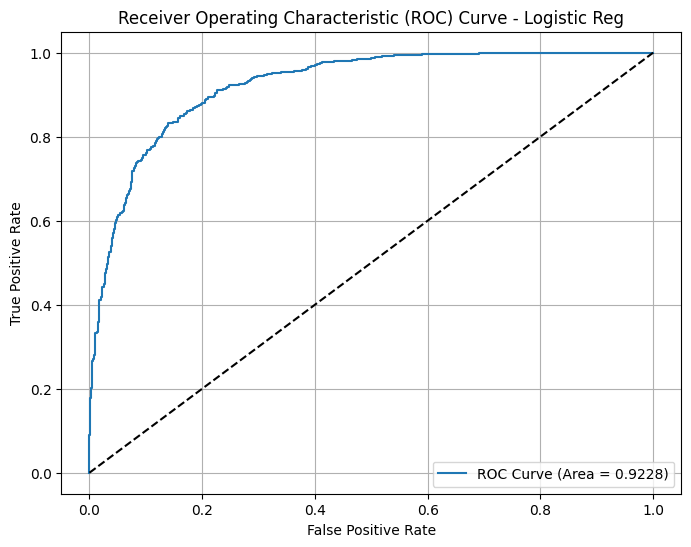

In [39]:
# try to plot roc/auc curve!
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, prob_predictions)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (Area = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal representing random predictions

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Reg')
plt.legend(loc='lower right')

plt.grid() # set gridlines
plt.show()


### Visualize Predictions with Sample of Reviews & Evaluate Performance

We will now examine which words have influenced sentiment most thrugh looking at SHAP and creating some powerful visualizations

In [40]:
import shap
shap.initjs()

In [41]:
explainer = shap.LinearExplainer(model_lr_best, X_train_tfidf, feature_names=tfidf_vectorizer.get_feature_names_out())
# need to pass in model, vectorized training set, as well as feature names -> vocabulary in this case

In [42]:
shap_values=explainer.shap_values(X_test_tfidf.toarray()[:200]) # for the first 200 examples, estimate the shap values for each feature (200 x n_features)

In [43]:
shap_values.shape

(200, 14290)

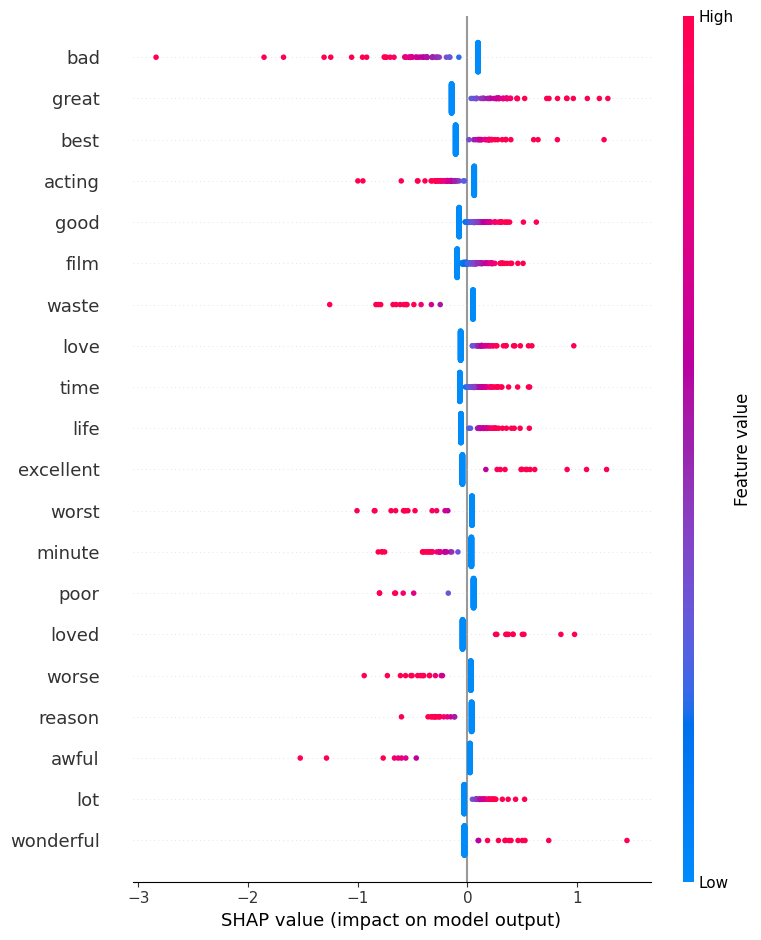

In [44]:
# create a summary plot (shows most important features globally for our set of 200 test examples)
shap.summary_plot(shap_values, X_test_tfidf.toarray()[:200], feature_names=tfidf_vectorizer.get_feature_names_out())

This is a really cool visual! It allows us to see which particular words are very influential in making the model predictions where typically more positive words like loved, excellent, and great contribute to a more positive SHAP value whereas more negative words like waste and worst have more negative SHAP values.

*Note: there are a variety of SHAP plots that can be created to examine what is influencing model predictions and aid in model interpretability*

In [46]:
# examine some reviews and compare predicted sentiment (>= 0.5 threshold) to actual label
test_indices = np.arange(0, y_test.shape[0]) # indices are between 0-1499
np.random.seed(123)
random_indices = np.random.choice(test_indices, size=15, replace=False) # get 15 random indices without replacement


for i in random_indices:
    print(f'Review #{i+1}\n')
    
    # retrieve original index of review (before train test split)
    orig_index = idx_test[i]
    
    # retrieve original review using this index (before preprocessing)
    orig_review = X.loc[orig_index]
    
    print(orig_review) # retrieve original review (before vectorization)

    goodReview = True if predictions[i] == 1 else False
    
    actual = True if y_test[i] == 1 else False # since y_test is encoded into 0s and 1s

    print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

    print('Actual: Is this a good review? {}\n'.format(actual))
    # print new line after
    print()

Review #709

I came across An Insomniac's Nightmare while looking for offbeat independent films, and glad to say it did NOT disappoint. This crazy half hour ride had me wondering all the way through, and the ending was excellent - one of those NOOOOO moments that really stays with you. I've shown it to a number of people and everyone seems to agree hands down. The little ghostie girl was very talented and I think her performance stole the show. She creeped the heck out of me, I can say that much. Nanavati did a great job putting this short together. All the pieces just fell into place and you can tell that she's a great writer from what she did with this script. SO well written. It's undoubtedly the strongest part of the film. The directing was great and the acting was enjoyable, but the most important factor here is the strength of the screenplay. Good job to this girl, I can't wait to see more!

Prediction: Is this a good review? True

Actual: Is this a good review? True


Review #14

We can see out of this small sample, the model does pretty well, however we can also see that with some of the reviews it can get confused by the language and suffers from not being able to capture the context around certain words.

Let's now examine a positive and negative review which was predicted right, as well as a review which wasn't and then examine its corresponding waterfall plot (from SHAP) to gain more insight into why those predictions.

We will then perform this same analysis on a new review which has not been seen before that I pulled from the internet.

In [47]:
def test_rev_analysis (index): # the index corresponds to a value between 0-1499 (since size of test set is 1500)
    # for positive review
    idx_orig = idx_test[index]
    pos_rev_test = X.loc[idx_orig]

    print(pos_rev_test) # retrieve original review (before vectorization)
    goodReview = True if predictions[index] == 1 else False
    actual = True if y_test[index] == 1 else False # since y_test is encoded into 0s and 1s
    print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 
    print('Actual: Is this a good review? {}\n'.format(actual))

    # notice we've only created shap_values for the first 200 reviews so if the index provided is out of range, we will have to calculate a new one
    vectorized = X_test_tfidf[index]

    if (index < 200):
        shap_value = shap_values[index]
    else:
        shap_value = explainer.shap_values(vectorized) # if it is not already calculated, then calculate it
        shap_value = shap_value[0]

    # examine its waterfall plot, first have to create an explanation object
    explanation = shap.Explanation(
        values=shap_value,
        base_values=explainer.expected_value,
        data=vectorized.toarray()[0],
        feature_names=tfidf_vectorizer.get_feature_names_out()
    )

    shap.plots.waterfall(explanation)

True Positive Review Example:
The plot of the story and the performance of the lead actors are very much down-to-earth! The romance between two teen-age boys on the screen was done in good taste. You can easily relate to their emotions if you are one but if you are not one, you can appreciate the kind of love the film is trying to impart.

Prediction: Is this a good review? True

Actual: Is this a good review? True



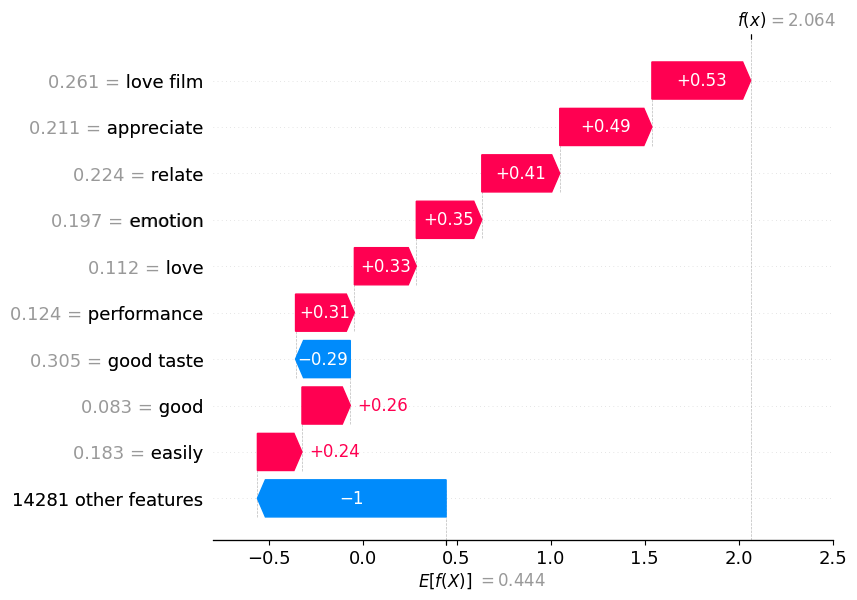

True Negative Review Example:
I hadn't planned on watching O12 because I didn't like O11 that much. I thought O11 was a nice but slightly boring little bank robbers movie with a sensational arsenal of stars. Anyway I was talked into watching O12 one night and I regretted it a lot. The plot is not only boring but also senseless. I honestly don't even know what it was all about. I left the movie after 3 quarters and got some coffee with another girl who didn't like it. Much more pleasure I can tell you that. But even the guys who stayed till the end later reported to me that the plot continued being awful and useless. My advice: Don't watch. Go watch Team America (hilarious btw;-)) and forget about Ocean's Twelve.<br /><br />In my opinion the most boring and senseless peace of crap to be on the screen in years.

Prediction: Is this a good review? False

Actual: Is this a good review? False



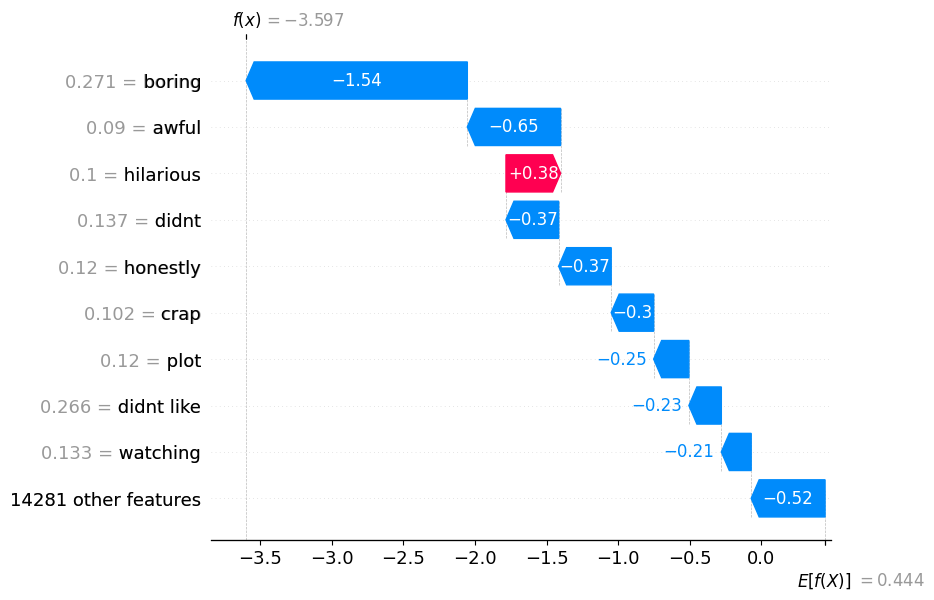

Incorrectly Predicted Review Example:
Arg. The shuffling dinosaurs are back to take another bite out of our sanity in this all-awful third film. This time, European terrorists(Irish I'd say) hi-jack an army convoy supposed to be transporting uranium. They pull into a shipyard, open the truck and discover our old friends the carnosaurs. Pandemonium comes visiting then when the rubber dinos chomp the terrorists, the cops and some marines. The whole film seems to be (again) largely inspired from Alien(as Carnosaur 2 was) with the pathetic marines going through the "claustrophobic" shipyard? guns at the ready. This third opus is probably the driest and ungoriest film of the lot, with only one spurt of blood when a rubber dino rips a marine's head off. The dinos are stiff, shuffling creatures as usual and the T-Rex sounds like an enraged elephant when it roars(it also appears to have no eyes). One of the goofiest scenes of the film is when the coppers arrive on the scene: they enter the bui

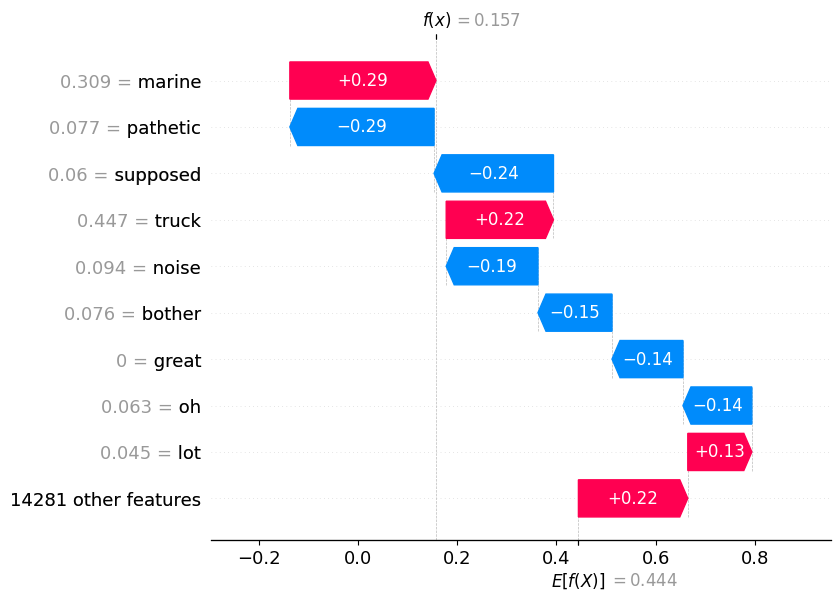

In [48]:
import random
# we know review #93 is pretty clearly positive (from running the above code before) so lets perform this analysis on it
print('True Positive Review Example:')
test_rev_analysis(93)

# lets grab a review from the test set which was negative and predicted correctly
true_neg_indices = [i for i, actual in enumerate(y_test) if actual == 0 and predictions[i] == 0]
# set seed for reproducability
random.seed(42)
true_neg_index = random.choice(true_neg_indices)

print('True Negative Review Example:')
test_rev_analysis(true_neg_index)

# let's now grab a review that the model didn't predict right, looks like above review 975 (index 974) is one example
print('Incorrectly Predicted Review Example:')
test_rev_analysis(974)


These are very insightful! We can see in the case of the misclassified review that certain words like 'marine', and 'truck' (as well as the other features at bottom) contributed towards a positive prediction, increasing the overall SHAP value, while other words pushed it negatively like 'pathetic', 'noise' and even unusually the word 'great'. This overall resulted in a slightly positive SHAP value and weakly positive prediction, which explains why the model made that decision.

In [ ]:
def predict_new (review):
    # we need to first preprocess this review so it is interpretable by the model
    cleaned_review = preprocess(review)
    # now vectorize this cleaned review using the tfidf vectorizer we fit earlier
    vectorized_review = tfidf_vectorizer.transform([cleaned_review])

    # make our prediction
    prediction = model_lr_best.predict(vectorized_review)
    prob = model_lr_best.predict_proba(vectorized_review)

    # retrieve new shap values to showcase prediction
    shap_value = explainer.shap_values(vectorized_review)

    # display information
    print('Original Review: ', review)
    print('Processed Review: ', cleaned_review)

    goodReview = True if prediction == 1 else False
    print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 
    print('True label: Unknown\n')

    # # create the waterfall plot
    explanation = shap.Explanation(
        values=shap_value[0],
        base_values=explainer.expected_value,
        data=vectorized_review.toarray()[0], # remember to convert to array since it is a sparse matrix
        feature_names=tfidf_vectorizer.get_feature_names_out()
    )

    shap.waterfall_plot(explanation)


[0.07420516 0.92579484]
Original Review:  I know everyone wants to compare this to the Animated version, but don't. Take it as it comes and you will thoroughly enjoy it. It does stay pretty faithful to the animated version I think. Will Smith as the genie could never be the Robyn Williams genie, but I don't think he tries to. He does fantastically well in his own right. Absolutely loved the Prince Ali song where Aladdin enters the city as the prince. Brilliantly colorful spectacle captured really well. Jafar missed a little for me as had lost the smarmy-ness of the animated version. The songs were great and the Aladdin and Jasmine characterization was pretty spot on. I think kids would love this and I would definitely recommend it.
Processed Review:  know everyone want compare animated version dont take come thoroughly enjoy stay pretty faithful animated version think smith genie could never robyn williams genie dont think try fantastically well right absolutely loved prince ali song a

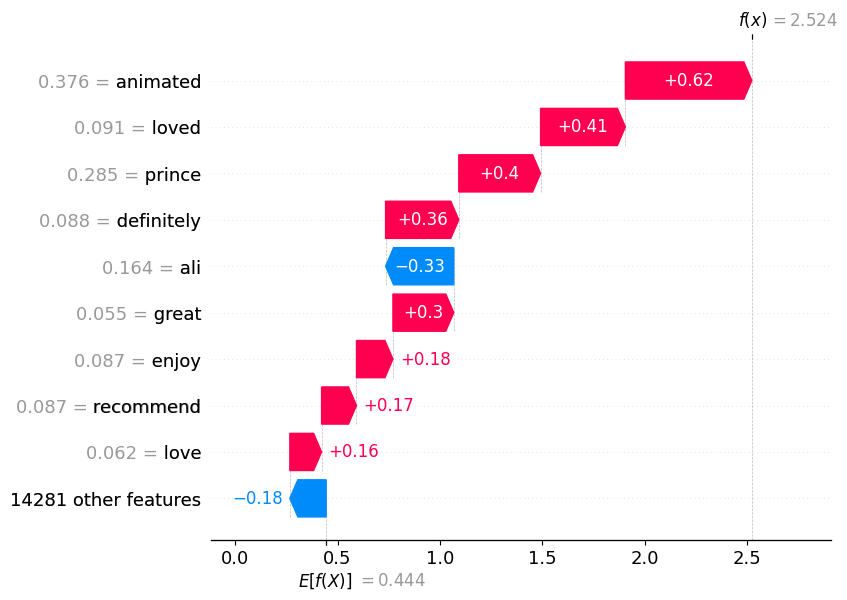

In [56]:
online_review_pos = "I know everyone wants to compare this to the Animated version, but don't. Take it as it comes and you will thoroughly enjoy it. It does stay pretty faithful to the animated version I think. Will Smith as the genie could never be the Robyn Williams genie, but I don't think he tries to. He does fantastically well in his own right. " \
"Absolutely loved the Prince Ali song where Aladdin enters the city as the prince. " \
"Brilliantly colorful spectacle captured really well. Jafar missed a little for me as had lost the smarmy-ness of the animated version. The songs were great and the Aladdin and Jasmine characterization was pretty spot on. I think kids would love this and I would definitely recommend it."

predict_new(online_review_pos)

Save Logistic Regression Model as a Pickle File

In [51]:
# save as a pkl file, which serializes this python object
import pickle

filename = 'log_reg_model.sav'
pickle.dump(model_lr_best, open(filename, 'wb'))

In [52]:
# we also need to save our fitted vectorizer & explainer objects
filename = 'tfidf_vectorizer.sav'
pickle.dump(tfidf_vectorizer, open(filename, 'wb'))

filename = 'shap_explainer.sav'
pickle.dump(explainer, open(filename, 'wb'))